In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_train.max()

255

In [12]:
# Scaling
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

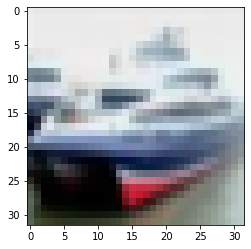

In [15]:
plt.imshow(X_test[1])

## Build CNN Model

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape = [32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [22]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 144s 3ms/sample - loss: 1.3767 - sparse_categorical_accuracy: 0.5066 - val_loss: 1.1033 - val_sparse_categorical_accuracy: 0.6105
Epoch 2/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 1.0663 - sparse_categorical_accuracy: 0.6206 - val_loss: 1.0655 - val_sparse_categorical_accuracy: 0.6279
Epoch 3/10
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.9425 - sparse_categorical_accuracy: 0.6660 - val_loss: 0.9211 - val_sparse_categorical_accuracy: 0.6757
Epoch 4/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 0.8580 - sparse_categorical_accuracy: 0.6952 - val_loss: 0.9234 - val_sparse_categorical_accuracy: 0.6832
Epoch 5/10
50000/50000 [==============================] - 142s 3ms/sample - loss: 0.7929 - sparse_categorical_accuracy: 0.7179 - val_loss: 0.8994 - val_sparse_categorical_accuracy: 0.6853
Epoch 6/10

In [ ]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
y_pred

In [ ]:
mat = confusion_matrix(y_test, y_pred)
mat

In [ ]:
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)